In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import PIL
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib as mpl
%matplotlib inline
PROJECT_DIR = "/content/drive/Shareddrives/CNN"
os.chdir(PROJECT_DIR)

In [3]:
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

In [4]:
def show_augmentedData(dataset, m, n=6):
    img = np.vstack((np.hstack((np.array(dataset[i]) for _ in range(n))) for i in range(m)))
    plt.imshow(img)
    plt.axis('off')
def output_augmentedData(dataset, m, n=6):
    output = []
    for i in range(m):
        for _ in range(n):
            output.append(np.array(dataset[i]))
    return np.array(output, dtype="uint8")

In [5]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR, fill=255)
])

In [6]:
class MyDataset(Dataset):
    def __init__(self, data, transforms):
        self.data = np.load(data)
        self.transforms = transforms
    def __getitem__(self, key):
        # if isinstance(key, slice):
        #     return [self.transforms(PIL.Image.fromarray(self.data[i])) for i in range(*(key.indices(self.data.shape[0])))]
        if isinstance(key, int):
            if key < 0:
                key += len(self.data)
            if key < 0 or key >= len(self.data):
                raise IndexError
            output = self.data[key]
            output = output[:, :, ::-1]
            output = PIL.Image.fromarray(output)
            output = self.transforms(output)
            return output
        else:
            raise TypeError
    def __len__(self):
        return self.data.shape[0]

In [8]:
fileName = "Pet Supplies(original)"
dataset = MyDataset('./Resampled Np/%s.npy'%fileName, transforms)

In [9]:
len(dataset.data)

84

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


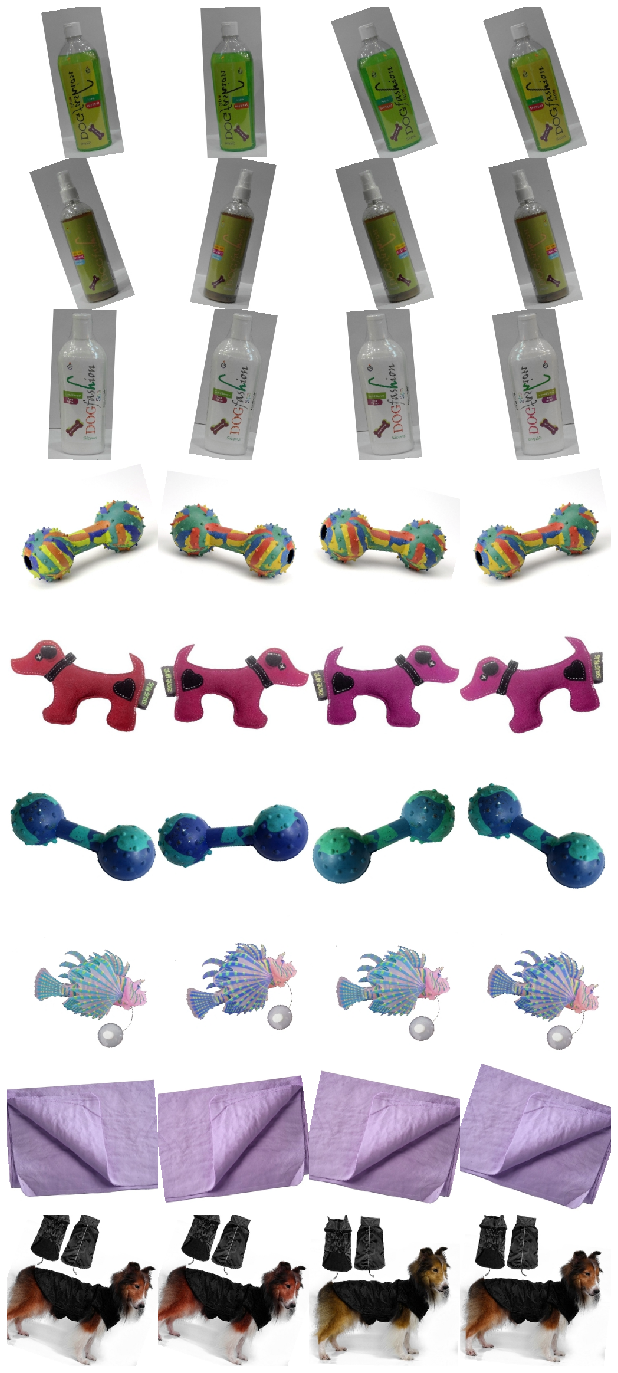

In [12]:
show_augmentedData(dataset, 9, 4)

In [ ]:
o = output_augmentedData(dataset, len(dataset.data), 9)

In [ ]:
o = np.concatenate((dataset.data, o), axis=0)

In [ ]:
print(o.shape)

(840, 256, 256, 3)


In [ ]:
np.save("./Resampled Np/%s(aug)"%fileName, o)